In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [2]:
data = np.array([0.34,0.63,0.22,0.48,0.37,0.32,0.46,0.19,0.18,0.41,0.45,0.30]).reshape(6,2)
print(data)


[[0.34 0.63]
 [0.22 0.48]
 [0.37 0.32]
 [0.46 0.19]
 [0.18 0.41]
 [0.45 0.3 ]]


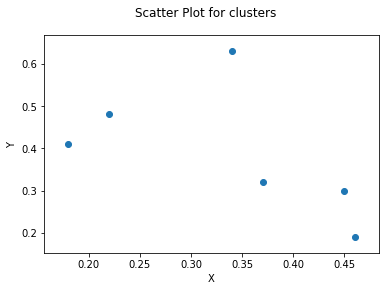

In [3]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

In [4]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean')
     
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()

In [5]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    
    
    for n in range(input.shape[0]):
        array.append(n)
       
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp

                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
     
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

[0, 1, 2, 3, 4, 5]


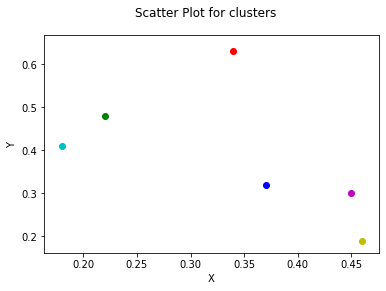

In [6]:
hierarchical_clustering(data,"single",6)

[0, 1, 2, 3, 1, 5]


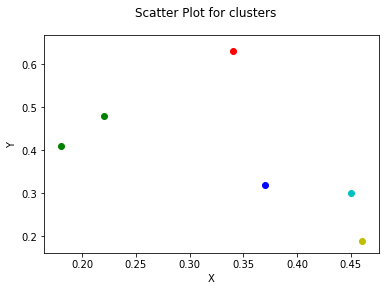

In [7]:
hierarchical_clustering(data,"single",5)

[0, 1, 2, 3, 1, 2]


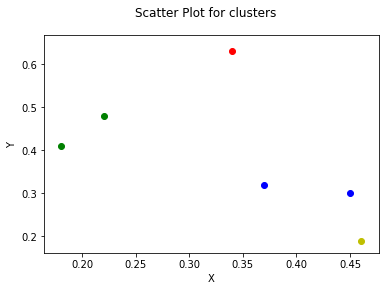

In [8]:
hierarchical_clustering(data,"single",4)

[0, 1, 2, 2, 1, 2]


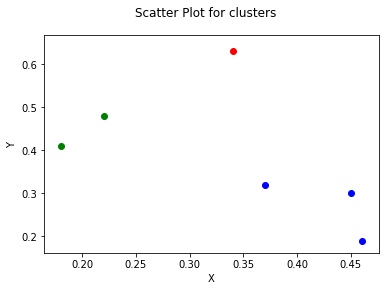

In [9]:
hierarchical_clustering(data,"single",3)

[0, 0, 2, 2, 0, 2]


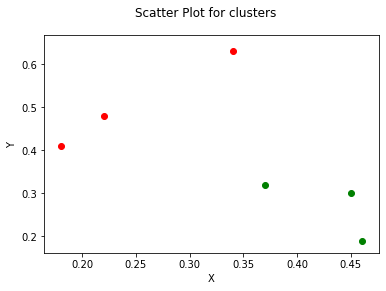

In [10]:
hierarchical_clustering(data,"single",2)

[0, 0, 0, 0, 0, 0]


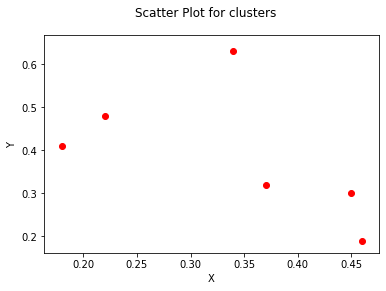

In [11]:
hierarchical_clustering(data,"single",1)

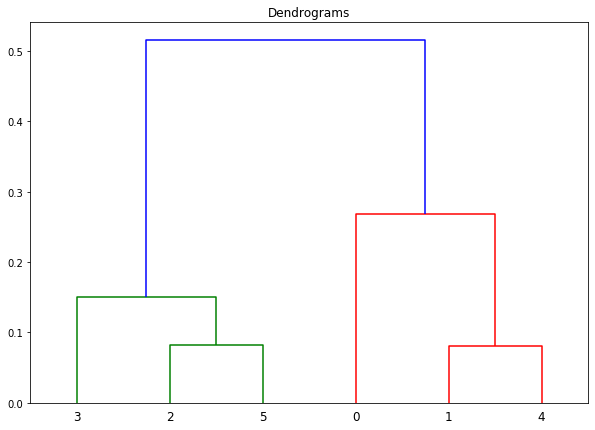

In [13]:
# plot dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))